In [1]:
import numpy as np
import h5py
import pandas as pd
import matplotlib.pyplot as plt
from statistics import pstdev

In [2]:
h5 = h5py.File('data/SG24_dataset.h5')

In [3]:
print(list(h5.keys()))
print(h5['Predictors'])
print(h5['Target'])
print(h5['User'])

['Predictors', 'Target', 'User']
<HDF5 dataset "Predictors": shape (29, 2400), type "<f8">
<HDF5 dataset "Target": shape (1, 2400), type "|i1">
<HDF5 dataset "User": shape (1, 2400), type "|i1">


In [13]:
predictors = np.asarray(h5['Predictors'])
pred = pd.DataFrame(predictors)
print(pred)


          0           1           2           3           4           5     \
0     0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
1     0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
2     0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
3     0.145442    0.195537    0.294340    0.352911    0.318924    0.318044   
4     0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
5    -0.989367   -0.980696   -0.955701   -0.935657   -0.947780   -0.948076   
6     0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
7    77.000000   20.000000   22.000000    7.000000  123.000000   31.000000   
8    67.000000  131.000000  139.000000  135.000000  164.000000  138.000000   
9    74.000000  127.000000  134.000000  137.000000   69.000000  131.000000   
10   94.000000  144.000000  125.000000  158.000000   56.000000  129.000000   
11  165.000000   63.000000   76.000000   70.000000   82.000000  

In [18]:
target = np.asarray(h5['Target'])
tar = pd.DataFrame(target[0])
print(tar)

       0
0      1
1      1
2      1
3      1
4      1
...   ..
2395  13
2396  19
2397   5
2398  24
2399   7

[2400 rows x 1 columns]


In [6]:
users = np.asarray(h5['User'])
user = pd.DataFrame(users[0])
print(user)

      0
0     1
1     1
2     1
3     1
4     1
...  ..
2395  8
2396  8
2397  8
2398  8
2399  8

[2400 rows x 1 columns]


In [19]:
normalized_predictors = (predictors - np.mean(predictors, axis = 0))/ np.std(predictors, axis = 0)
final_predictors = normalized_predictors[3:].transpose()
target = target.transpose()
print(final_predictors.shape)
print(target.shape)

(2400, 26)
(2400, 1)


In [10]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(final_predictors, target)


DecisionTreeClassifier()

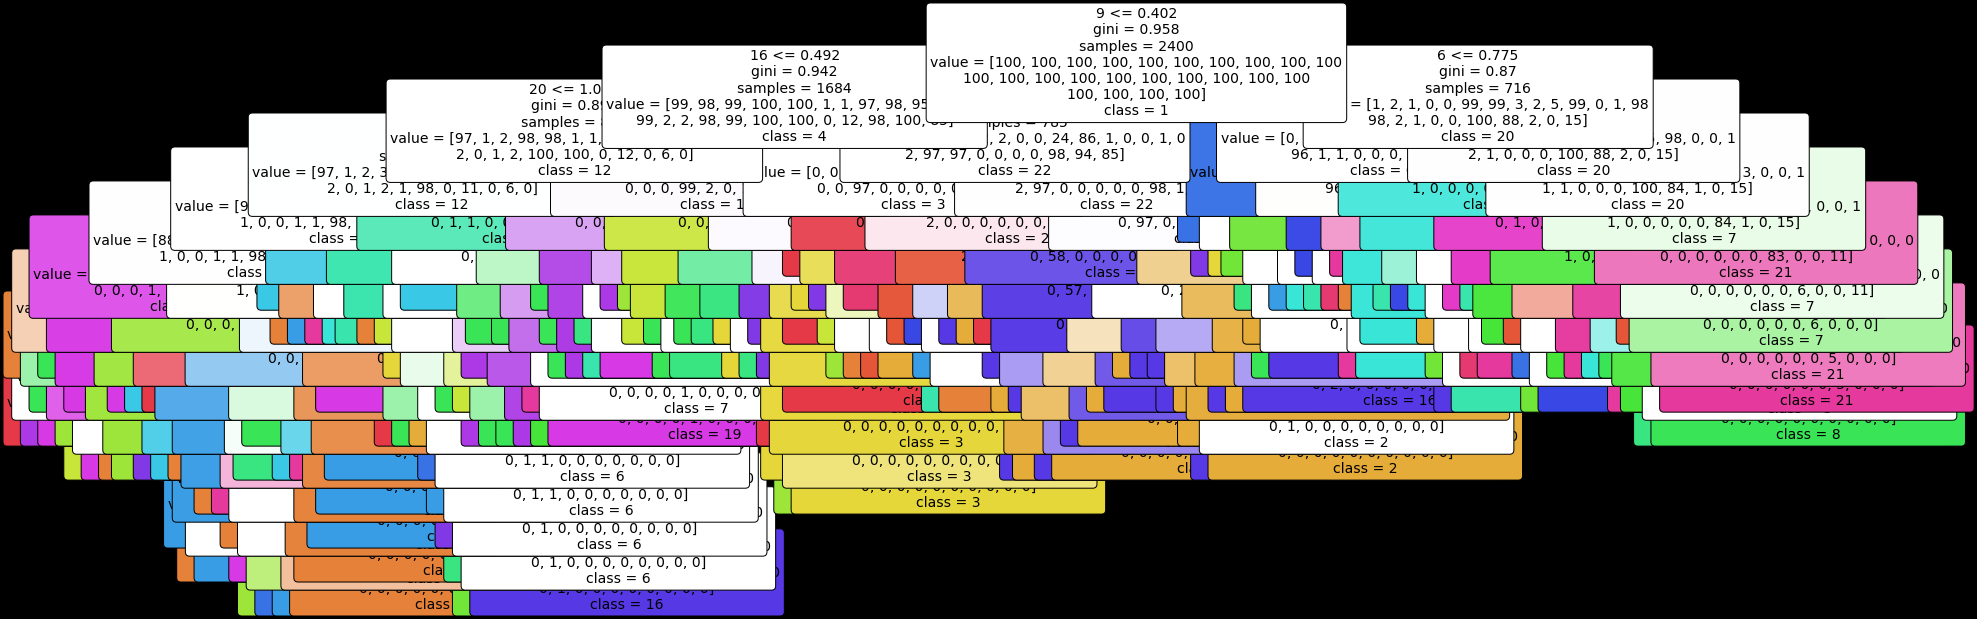

In [28]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10), facecolor ='k')
a = tree.plot_tree(clf, feature_names = [str(i) for i in np.arange(0,26)], class_names = [str(i) for i in np.unique(target)], rounded = True, filled = True,fontsize=14)

plt.show()

In [33]:
from sklearn.tree import export_text

tree_rules = export_text(clf,feature_names = [str(i) for i in np.arange(0,26)])
print(tree_rules)

|--- 9 <= 0.40
|   |--- 16 <= 0.49
|   |   |--- 20 <= 1.05
|   |   |   |--- 12 <= 0.28
|   |   |   |   |--- 7 <= 1.92
|   |   |   |   |   |--- 14 <= 0.54
|   |   |   |   |   |   |--- 6 <= 1.17
|   |   |   |   |   |   |   |--- 11 <= -0.45
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- 11 >  -0.45
|   |   |   |   |   |   |   |   |--- 17 <= 0.14
|   |   |   |   |   |   |   |   |   |--- 1 <= -1.22
|   |   |   |   |   |   |   |   |   |   |--- class: 23
|   |   |   |   |   |   |   |   |   |--- 1 >  -1.22
|   |   |   |   |   |   |   |   |   |   |--- class: 18
|   |   |   |   |   |   |   |   |--- 17 >  0.14
|   |   |   |   |   |   |   |   |   |--- class: 8
|   |   |   |   |   |   |--- 6 >  1.17
|   |   |   |   |   |   |   |--- 22 <= -0.36
|   |   |   |   |   |   |   |   |--- class: 8
|   |   |   |   |   |   |   |--- 22 >  -0.36
|   |   |   |   |   |   |   |   |--- 7 <= 0.60
|   |   |   |   |   |   |   |   |   |--- 23 <= 1.00
|   |   |   |   |   |   |   |   |   |

In [30]:
print(clf.feature_importances_)

[0.00496894 0.00481822 0.01412035 0.003153   0.03135326 0.04976902
 0.10392298 0.08230353 0.00413666 0.04358501 0.00324686 0.0087256
 0.08833554 0.00340525 0.13470527 0.01346947 0.07608933 0.01236094
 0.02124136 0.02150695 0.18871675 0.03145054 0.02151755 0.0010029
 0.02788963 0.00420511]
